## Clustering and Segmenting NewYork counties to see Covid-19 Impact :
As a part of IBM's Applied Data Science capstone course on coursera, I worked on a Capstone project where I used Four Square API and machine learning algorithm to fetch the required information and have attempted clustering analysis on it. This report consists of three parts: Business Problem and Data Preparation and cleaning, Methodology, Results and discussion and conclusion.

## Business Problem:
As we know, World has been facing an unprecedented threat of Covid-19. While, it has spread and penetrated rapidly into different parts of the globle, in the United States, New York is one of the worst hit state by COVID-19. New York city is at the center of the disaster. According to an article https://ny.eater.com/2020/12/9/22165800/indoor-dining-nyc-coronavirus-spread-robert-mujica by by Tanay Warerkar and Erika Adams,they mentioned that indoor dining at restaurants and bars are currently the fifth or sixth highest category in the city for the spread of the virus, but he did not outline what the top categories pushing the city toward a full-blown second wave of the pandemic. In this capestone project, I have attempted to find those top categories. For this research, I have taken the most affected counties in New York with a high number of confirmed cases. Furthermore, by using the four-Square API, we will figure out the top 10 common venues with the most foot traffic. After getting this information,a common man will get a glimpse into one of the causes of the rapid spread of the virus.

So, how could be leverage Foursquare location data and machine learning to help us in decision making and point to the evidence that pertains to the spread of coronavirus,so that we can know more about the causes? This is the problem which I am going to discuss by taking New York as an example. Here in this capstone, we will go through each step of this project and address them seperately. I will first outline the initial data preparation and describe future steps to start the analysis of venues in New York.

## Data Preparation
For this project we need the following data:

1.United states data that contains list of counties (Admin2) of each state with their longitudes and latitudes.

Data Source : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

2.Venues in each county of New York 

Data Source: FourSquare APIs

The project would use Four Square API as its primary data gathering source as it has a database of millions of places. Hence, The Four Square data is used to extract the venue data centered around the counties of New York. The venue data includes venue name, venue categories and location coordinates. From these two datasets, required venue categories would be identified and clustered using the k-means clustering algorithms.



## Data Cleaning:
After examining the United States dataset,let's first import some of the libraries that we’ll be using, and set some parameters to make the output easier to read.

In [1]:
import pandas as pd
import urllib
import requests

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
 #libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Load and Explore the Dataset
The datasource is the list of counties(Admin2) of each state of United States with Province state, latitude(lat) and longitude(long_) of each county. Here in New York data set link, Admin2 is the County of each state of United states. Now, load data into pandas dataframe to explore the data. Here We are using urllib.Request Python module for fetching Urls. In this module, HTTP is based on requests and responses - the client makes requests and servers send responses. urllib.request mirrors this with a Request object which represents the HTTP request you are making.Once it’s loaded, we’ll want to do some basic cleaning tasks to remove some information we don’t need that will make our data processing slower.

In [2]:
confirmed_csv_url= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
urlRequest = urllib.request.Request(confirmed_csv_url)

In [3]:
confirmed_data = urllib.request.urlopen(urlRequest)

In [4]:
confirmed_dataframe = pd.read_csv(confirmed_data, sep = ',', decimal = '.')
confirmed_dataframe.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,4849,4898,4957,5018,5047,5066,5080,5134,5170,5219


The above dataset is from January 2020 to january 2021, but here we are considering only one month festive season data from 11/25/2020 to 12/25/2020

In [5]:
# We are collecting dataset from "" site from 11/25/2020 to 12/25/2020
total_confirmed_cases = []
for i in range (0, 3340):
    sum_nov = 0
    for j in range (25, 30+1):
        day = str(j)
        col = "11/"+day+"/20"
        sum_nov = sum_nov + confirmed_dataframe[col][i]
        
        
    sum_dec = 0
    for j in range (1, 24+1):
        day = str(j)
        col = "12/"+day+"/20"
        sum_dec = sum_dec + confirmed_dataframe[col][i]
    
    total_confirmed_cases.append(sum_nov + sum_dec)

In [6]:
total_confirmed_cases

[96482,
 309224,
 37705,
 41662,
 107162,
 21727,
 38421,
 224930,
 58828,
 34611,
 74250,
 13436,
 55809,
 29615,
 25777,
 84432,
 110156,
 22636,
 12277,
 73719,
 23170,
 161739,
 79942,
 73260,
 168659,
 143588,
 65930,
 229325,
 33339,
 83440,
 40917,
 15228,
 33231,
 29051,
 177322,
 121107,
 1167787,
 24326,
 145977,
 45653,
 255713,
 153006,
 25485,
 24624,
 486435,
 42206,
 48825,
 222246,
 649209,
 27181,
 405411,
 241805,
 0,
 21984,
 41591,
 51224,
 33206,
 72416,
 365289,
 151003,
 19640,
 124068,
 59896,
 447223,
 0,
 126399,
 29984,
 21642,
 46791,
 1186,
 4220,
 577342,
 54062,
 0,
 4518,
 1537,
 3197,
 120382,
 562,
 0,
 27794,
 91474,
 6450,
 16822,
 16352,
 145251,
 7407,
 18277,
 11271,
 0,
 807,
 1817,
 6775,
 366,
 10131,
 5654,
 8606,
 671,
 1509,
 5589,
 0,
 183831,
 144709,
 260759,
 104322,
 74670,
 8906,
 30576,
 7281368,
 240527,
 276636,
 0,
 1470007,
 605134,
 139258,
 45,
 219053,
 634622,
 32083,
 30131,
 48367,
 414459,
 61978,
 19351,
 5135,
 50201,
 38

In our dataset, now I am going to add new column i.e total_confirmed_cases by summing up all the confirmed cases from 11/25 to 12/25.



In [7]:
confirmed_dataframe['total_confirmed_cases'] = total_confirmed_cases


In [8]:
confirmed_dataframe.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,total_confirmed_cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,4645,4705,4770,4847,4879,4902,4970,4998,5075,96482
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,14656,14845,15052,15202,15327,15417,15572,15701,15841,309224
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1597,1614,1634,1648,1658,1663,1679,1685,1696,37705
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1944,1981,2015,2038,2051,2060,2090,2109,2113,41662
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,4898,4957,5018,5047,5066,5080,5134,5170,5219,107162


Now its time to drop the columns which are not required in our dataset for analysis i.e. iso2,iso3,code3, FIPS, all dates. And our final dataset after cleaning would be look like the following.

In [9]:
final_data = confirmed_dataframe[["UID","Admin2","Province_State","Country_Region","Lat","Long_","Combined_Key", "total_confirmed_cases"]]
final_data.head()

,UID,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,total_confirmed_cases
0,84001001,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",96482
1,84001003,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",309224
2,84001005,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",37705
3,84001007,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",41662
4,84001009,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",107162


In [10]:
final_data.shape

(3340, 8)

From the final United States dataset, We are retrieve only "New york" province_state data with all counties having location coordinates and confirmed covid-19 cases. After this, eliminating the rows which has 0 latitudes and longitudes. And then, arrange the confirmed cases in ascending order to know which 10 counties have maximun confirmned cases amongst all.¶

In [11]:
df_newyork = final_data[final_data['Province_State'].str.contains("New York")].reset_index(drop=True)
df_newyork

,UID,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,total_confirmed_cases
0,84036001,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",222109
1,84036003,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",38647
2,84036005,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",2174033
3,84036007,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",185564
4,84036009,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",47072
...,...,...,...,...,...,...,...,...
59,84036115,Washington,New York,US,43.311538,-73.430434,"Washington, New York, US",16173
60,84036117,Wayne,New York,US,43.154944,-77.029765,"Wayne, New York, US",46125
61,84036119,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",1697447
62,84036121,Wyoming,New York,US,42.701451,-78.221996,"Wyoming, New York, US",23675


In [12]:
# cleaning the data)
df_newyork = df_newyork.drop(df_newyork[(df_newyork['Lat'] == 0.000000)& (df_newyork['Long_'] ==0.000000)].index)
df_newyork

,UID,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,total_confirmed_cases
0,84036001,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",222109
1,84036003,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",38647
2,84036005,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",2174033
3,84036007,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",185564
4,84036009,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",47072
...,...,...,...,...,...,...,...,...
59,84036115,Washington,New York,US,43.311538,-73.430434,"Washington, New York, US",16173
60,84036117,Wayne,New York,US,43.154944,-77.029765,"Wayne, New York, US",46125
61,84036119,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",1697447
62,84036121,Wyoming,New York,US,42.701451,-78.221996,"Wyoming, New York, US",23675


In [13]:
df_newyork.sort_values(by = ["total_confirmed_cases"], ascending = False, inplace = True)
df_newyork = df_newyork.reset_index()

In [14]:
df_newyork

,index,UID,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,total_confirmed_cases
0,41,84036081,Queens,New York,US,40.710881,-73.816847,"Queens, New York, US",3075880
1,23,84036047,Kings,New York,US,40.636183,-73.949356,"Kings, New York, US",3032465
2,2,84036005,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",2174033
3,52,84036103,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",2131987
4,29,84036059,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",2041981
...,...,...,...,...,...,...,...,...,...
57,48,84036097,Schuyler,New York,US,42.391840,-76.877330,"Schuyler, New York, US",11096
58,15,84036031,Essex,New York,US,44.116308,-73.772978,"Essex, New York, US",10613
59,63,84036123,Yates,New York,US,42.635055,-77.103699,"Yates, New York, US",9972
60,47,84036095,Schoharie,New York,US,42.588317,-74.443390,"Schoharie, New York, US",8929


### After cleaning the dataset, our final dataset has ready for analysis which contains top 10 Admin2 with most confirmed cases.
Admin2 - County of New York, Lat - lattitude of counties, long_ - Longitude of counties, total_confirmed_cases - confirmed cases of covid-19 in each county

In [15]:
df_newyork1=df_newyork[0:10]
df_newyork1

,index,UID,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,total_confirmed_cases
0,41,84036081,Queens,New York,US,40.710881,-73.816847,"Queens, New York, US",3075880
1,23,84036047,Kings,New York,US,40.636183,-73.949356,"Kings, New York, US",3032465
2,2,84036005,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",2174033
3,52,84036103,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",2131987
4,29,84036059,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",2041981
5,61,84036119,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",1697447
6,30,84036061,New York,New York,US,40.767273,-73.971526,"New York, New York, US",1491692
7,14,84036029,Erie,New York,US,42.762490,-78.730637,"Erie, New York, US",923210
8,43,84036085,Richmond,New York,US,40.585822,-74.148086,"Richmond, New York, US",821672
9,44,84036087,Rockland,New York,US,41.150279,-74.025605,"Rockland, New York, US",702213


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

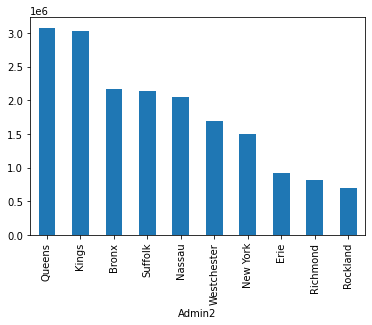

In [17]:
df_newyork1.groupby("Admin2").total_confirmed_cases.mean().sort_values(ascending=False)[:10].plot.bar()